In [2]:
# log regression
# feature: start, end, day
# result: duration

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


df_04 = pd.read_csv("../data/yellow_tripdata_2020-04.csv")
df_05 = pd.read_csv("../data/yellow_tripdata_2020-05.csv")

/var/folders/wg/62v23f191zsbtpgk23vhgv2h0000gn/T/ipykernel_54598/2703673051.py:16: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_04 = pd.read_csv("../data/yellow_tripdata_2020-04.csv")
/var/folders/wg/62v23f191zsbtpgk23vhgv2h0000gn/T/ipykernel_54598/2703673051.py:17: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_05 = pd.read_csv("../data/yellow_tripdata_2020-05.csv")


In [3]:
df_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238073 entries, 0 to 238072
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               238073 non-null  int64  
 1   tpep_pickup_datetime   238073 non-null  object 
 2   tpep_dropoff_datetime  238073 non-null  object 
 3   passenger_count        218493 non-null  float64
 4   trip_distance          238073 non-null  float64
 5   RatecodeID             218493 non-null  float64
 6   store_and_fwd_flag     218493 non-null  object 
 7   PULocationID           238073 non-null  int64  
 8   DOLocationID           238073 non-null  int64  
 9   payment_type           238073 non-null  int64  
 10  fare_amount            238073 non-null  float64
 11  extra                  238073 non-null  float64
 12  mta_tax                238073 non-null  float64
 13  tip_amount             238073 non-null  float64
 14  tolls_amount           238073 non-nu

In [4]:
df_04['tpep_pickup_datetime'] =  pd.to_datetime(df_04['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
df_04['tpep_dropoff_datetime'] =  pd.to_datetime(df_04['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
df_04['trip_duration'] = (df_04['tpep_dropoff_datetime'] - df_04['tpep_pickup_datetime']).dt.seconds
df_04['PULocationID'].fillna(-1, inplace = True)
df_04['DOLocationID'].fillna(-1, inplace = True)
df_05['tpep_pickup_datetime'] =  pd.to_datetime(df_05['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
df_05['tpep_dropoff_datetime'] =  pd.to_datetime(df_05['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
df_05['trip_duration'] = (df_05['tpep_dropoff_datetime'] - df_05['tpep_pickup_datetime']).dt.seconds
df_05['PULocationID'].fillna(-1, inplace = True)
df_05['DOLocationID'].fillna(-1, inplace = True)

In [16]:
train_X = df_04[['PULocationID','DOLocationID']]
train_y = df_04[['trip_duration']]
model_y = df_04[['total_amount']]
test_X = df_05[['PULocationID','DOLocationID']]
test_y = df_05[['trip_duration']]

train_X

,trip_duration
0,1231
1,805
2,539
3,600
4,302
...,...
238068,540
238069,600
238070,780
238071,2275


/Users/kenoc1/.conda/envs/taxi2/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/kenoc1/.conda/envs/taxi2/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0.00040681509586149023
coeff -[[-0.32465262 -0.64067315]]
intercept-[831.94343399]
-0.0011077424827028448
trip_duration   -125.119695
dtype: float64


ValueError: x and y must be the same size

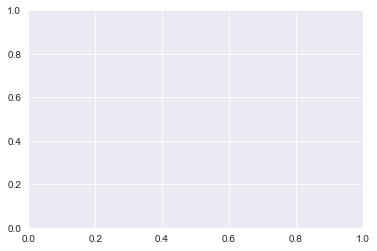

In [15]:
reg = LinearRegression().fit(train_X, train_y)

pred_y = reg.predict(test_X)
np.mean(pred_y-test_y)

print(reg.score(train_X, train_y))
print("coeff -" + str(reg.coef_))
print("intercept-"+str(reg.intercept_))

print(reg.score(test_X,test_y))
print(np.mean(pred_y-test_y))

#reg.fit(train_X, train_y)
#plt.scatter(train_X, train_y,color='g')
#plt.plot(train_X, reg.predict(train_X),color='k')
#plt.show()

In [19]:
from sklearn.metrics import mean_squared_error

avg_fare=round(np.mean(train_y),2) #11.31
baseline_pred=np.repeat(avg_fare,test_y.shape[0])
baseline_rmse=np.sqrt(mean_squared_error(baseline_pred, test_y))
print("Basline RMSE of Validation data :",baseline_rmse)

Basline RMSE of Validation data : 2858.882293023482


/Users/kenoc1/.conda/envs/taxi2/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [20]:
lm = LinearRegression()
lm.fit(train_X,train_y)
y_pred=np.round(lm.predict(test_X),2)
lm_rmse=np.sqrt(mean_squared_error(y_pred, test_y))
lm_train_rmse=np.sqrt(mean_squared_error(lm.predict(train_X), train_y))
lm_variance=abs(lm_train_rmse - lm_rmse)
print("Test RMSE for Linear Regression is ",lm_rmse)
print("Train RMSE for Linear Regression is ",lm_train_rmse)
print("Variance for Linear Regression is ",lm_variance)

Test RMSE for Linear Regression is  2857.6378041740777
Train RMSE for Linear Regression is  2775.454535791917
Variance for Linear Regression is  82.1832683821608


In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 883,n_jobs=-1)
rf.fit(train_X,train_y)
rf_pred= rf.predict(test_X)
rf_rmse=np.sqrt(mean_squared_error(rf_pred, test_y))
print("RMSE for Random Forest is ",rf_rmse)

/var/folders/wg/62v23f191zsbtpgk23vhgv2h0000gn/T/ipykernel_54598/1841367022.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_X,train_y)


RMSE for Random Forest is  2979.370594065516
